# Graduate Rotational Internship Program (GRIP)

# Step 1 : Data Collection

In [29]:
# Importing the necessary libraries :

import pandas as pd                   # for dataframe
import numpy as np                   # for mathematical calculation
import matplotlib.pyplot as plt      # graphs
import seaborn as sns                # graphs

In [30]:
# Reading the Data :

url = 'http://bit.ly/w-data'              # Fetching data from url
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 2  :  Understanding / Knowing the data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [33]:
#  Checking the null or missing values :

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null or missing value present in the data.

# Step 4 : Data Visualization

Text(24.05000000000001, 0.5, 'SCORES')

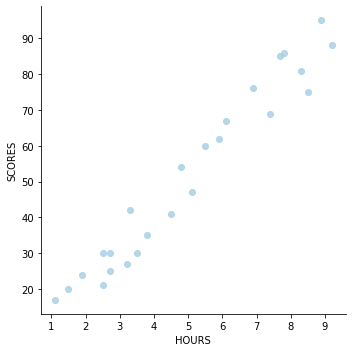

In [38]:
# Scatter Plot :

sns.lmplot(x= 'Hours', y ='Scores', data=data , fit_reg =False)
plt.xlabel('HOURS')
plt.ylabel('SCORES')


CORRELATION :

To check the relation between the data we use the correlation function and using this correlation function we then plot a 
heat map to see whether the data is properly correlated or not.


In [39]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

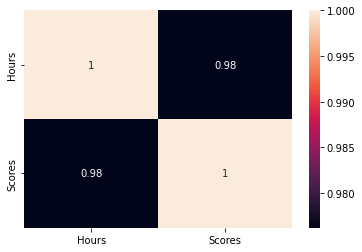

In [41]:
# HEAT MAP :

sns.heatmap( data= data.corr() , annot=True)

The correaltion exist here is positive and highly correlated.

# Step 4 : Model Building 

In [44]:
# Spliting the data into dependent and independent variables :

x = data.iloc[ : , 0:1]               # independent

In [47]:
x.head(3)

,Hours
0,2.5
1,5.1
2,3.2


In [48]:
  
y = data.iloc[ : , -1]             # dependent

In [50]:
y.head(3)

0    21
1    47
2    27
Name: Scores, dtype: int64

# Training and Testing Split

In [54]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( x ,y , test_size=0.2 , random_state = 2)

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain,ytrain)

LinearRegression()

# Model Evaluation

In [59]:
ypred = lr.predict(xtest)

In [62]:
lr.predict([[9.25]])                # predited score if a student studies for 9.25 hrs/day

array([93.45860056])

# Calculating Slope

In [63]:
# y = mx + c : 

c = lr.intercept_          # c is intercept
c

1.5079104828268726

In [66]:
m = lr.coef_              # m is slope 
m

array([9.94061514])

In [68]:
x1  = 9.25              # calculating for 9.25 hrs/day

In [69]:
y = m * x1 +c
y

array([93.45860056])

Here we can interpret that the slope matches the predicted value.

#  Accuracy of the Model

In [70]:
from sklearn.metrics import accuracy_score

lr.score(xtest,ytest)

0.9735538080811826

# Best Line fit

Text(0, 0.5, 'Scores')

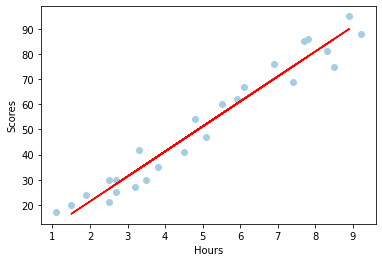

In [75]:
plt.scatter(data['Hours'],data['Scores'])
plt.plot(xtrain,lr.predict(xtrain),color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")